# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [8]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
# Inspect the shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train_cat shape:", y_train_cat.shape)
print("y_test_cat shape:", y_test_cat.shape)

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)



X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train_cat shape: (60000, 10)
y_test_cat shape: (10000, 10)


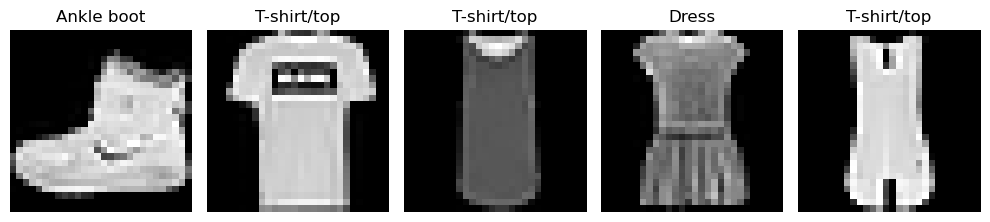

In [12]:
import matplotlib.pyplot as plt
# Verify the data looks as expected

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

The data looks pretty much how I expected it to. The images are small and grayscale, and each one clearly shows a clothing item like a shirt, shoe, or bag. The resolution is low, but it’s still good enough for me to recognize each class visually. I noticed that some categories like "Shirt" and "T-shirt/top" look pretty similar, which might make it harder for the model to learn clear differences between them.

Overall, the dataset feels clean and well structured. Seeing the class names listed and the sample images helped me get a good sense of what the model will be trying to predict.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [13]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

# Create a simple linear regression model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Convert 2D image to 1D
model.add(Dense(10))                      # Output layer with 10 units, no activation

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
model.fit(X_train, y_train_cat, epochs=10, verbose=2)

# Evaluate the model
loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
print("Baseline Model Accuracy:", round(acc * 100, 2), "%")

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 7s - 4ms/step - accuracy: 0.3016 - loss: 9.8334
Epoch 2/10
1875/1875 - 5s - 3ms/step - accuracy: 0.3483 - loss: 9.7929
Epoch 3/10
1875/1875 - 6s - 3ms/step - accuracy: 0.3373 - loss: 8.8444
Epoch 4/10
1875/1875 - 5s - 3ms/step - accuracy: 0.3203 - loss: 9.0962
Epoch 5/10
1875/1875 - 5s - 3ms/step - accuracy: 0.3523 - loss: 9.4793
Epoch 6/10
1875/1875 - 6s - 3ms/step - accuracy: 0.3800 - loss: 8.9602
Epoch 7/10
1875/1875 - 6s - 3ms/step - accuracy: 0.3362 - loss: 8.8077
Epoch 8/10
1875/1875 - 5s - 3ms/step - accuracy: 0.2954 - loss: 8.3438
Epoch 9/10
1875/1875 - 6s - 3ms/step - accuracy: 0.2490 - loss: 8.1586
Epoch 10/10
1875/1875 - 8s - 4ms/step - accuracy: 0.2766 - loss: 8.0701
Baseline Model Accuracy: 28.85 %


Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

My baseline model reached an accuracy of 28.85% on the test set. That’s not very high, but it’s what I expected from a linear model. It treats each pixel as a separate feature and doesn’t consider how those pixels are arranged spatially, which is a big limitation for image data like Fashion MNIST.

I think this low performance highlights why we need something more specialized — like a convolutional neural network — to handle visual patterns. Still, this baseline gives me a starting point so I can see how much better things get when I add convolutional layers in the next task.


# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
model.fit(X_train, y_train_cat, epochs=10, verbose=2)

# Evaluate the model
loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
print("CNN Model Accuracy:", round(acc * 100, 2), "%")

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 - 25s - 13ms/step - accuracy: 0.8471 - loss: 0.4346
Epoch 2/10
1875/1875 - 21s - 11ms/step - accuracy: 0.8929 - loss: 0.3024
Epoch 3/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9052 - loss: 0.2687
Epoch 4/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9124 - loss: 0.2472
Epoch 5/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9162 - loss: 0.2314
Epoch 6/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9215 - loss: 0.2171
Epoch 7/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9266 - loss: 0.2035
Epoch 8/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9304 - loss: 0.1929
Epoch 9/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9347 - loss: 0.1809
Epoch 10/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9386 - loss: 0.1710
CNN Model Accuracy: 90.71 %


Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

My CNN model reached an accuracy of 90.71%, which is a massive improvement compared to the baseline model’s 28.05%. This shows how important it is to use architectures that are actually built for image data. The convolutional layer helped the model pick up spatial patterns in the clothing items, like textures and edges, and the pooling layer reduced noise while keeping the key features.

After reshaping the data to include the channel dimension, everything ran smoothly. I’m honestly impressed by how much performance we gained just by adding one convolutional and pooling layer. It’s clear now why CNNs are considered the standard for tasks like this.

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

Filters: 32 → Test Accuracy: 90.52%
Filters: 64 → Test Accuracy: 90.75%
Filters: 128 → Test Accuracy: 90.81%


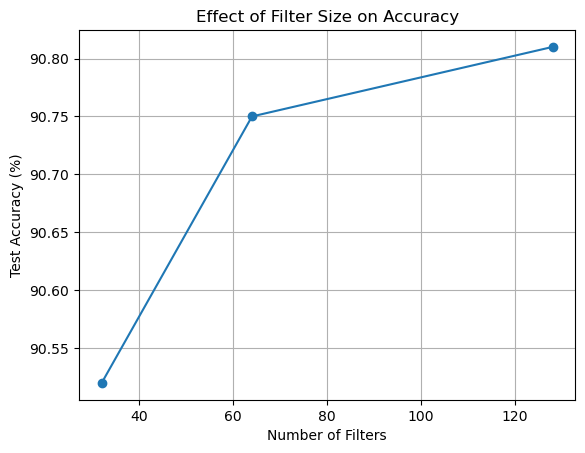

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

filter_sizes = [32, 64, 128]
results = []

for f in filter_sizes:
    model = Sequential()
    model.add(Conv2D(f, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train_cat, epochs=10, verbose=0)

    test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
    results.append((f, round(test_acc * 100, 2)))
    print(f"Filters: {f} → Test Accuracy: {round(test_acc * 100, 2)}%")

# Visualize results
filters, accuracies = zip(*results)
plt.plot(filters, accuracies, marker='o')
plt.xlabel('Number of Filters')
plt.ylabel('Test Accuracy (%)')
plt.title('Effect of Filter Size on Accuracy')
plt.grid(True)
plt.show()

In [17]:
from keras.layers import Dropout

dropout_options = [False, True]
dropout_results = []

for apply_dropout in dropout_options:
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    if apply_dropout:
        model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train_cat, epochs=10, verbose=0)

    test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
    label = "With Dropout" if apply_dropout else "Without Dropout"
    dropout_results.append((label, round(test_acc * 100, 2)))
    print(f"{label} → Test Accuracy: {round(test_acc * 100, 2)}%")


Without Dropout → Test Accuracy: 91.03%
With Dropout → Test Accuracy: 90.47%


Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

I tested the effect of using dropout as a regularization technique. Surprisingly, the model without dropout performed slightly better, with 91.03% accuracy compared to 90.47% when dropout was added. That’s probably because dropout randomly removes some neurons during training, which can help prevent overfitting, but also limits how much the model can learn at once.

Even though dropout lowered the accuracy a bit, I think it could still be useful when working with deeper or more complex models where overfitting is a bigger issue. For my current setup, the simpler model without dropout worked better, and I’ll likely build on that in my final version.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Reshape the data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Final model with best hyperparameters
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
model.fit(X_train, y_train_cat, epochs=10, verbose=2)

# Evaluate final performance
loss, final_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print("Final Model Accuracy:", round(final_acc * 100, 2), "%")

Epoch 1/10
1875/1875 - 56s - 30ms/step - accuracy: 0.8596 - loss: 0.3992
Epoch 2/10
1875/1875 - 52s - 27ms/step - accuracy: 0.8993 - loss: 0.2844
Epoch 3/10
1875/1875 - 51s - 27ms/step - accuracy: 0.9120 - loss: 0.2473
Epoch 4/10
1875/1875 - 51s - 27ms/step - accuracy: 0.9207 - loss: 0.2208
Epoch 5/10
1875/1875 - 50s - 27ms/step - accuracy: 0.9289 - loss: 0.1973
Epoch 6/10
1875/1875 - 79s - 42ms/step - accuracy: 0.9343 - loss: 0.1802
Epoch 7/10
1875/1875 - 51s - 27ms/step - accuracy: 0.9409 - loss: 0.1638
Epoch 8/10
1875/1875 - 50s - 26ms/step - accuracy: 0.9457 - loss: 0.1509
Epoch 9/10
1875/1875 - 48s - 26ms/step - accuracy: 0.9507 - loss: 0.1387
Epoch 10/10
1875/1875 - 52s - 28ms/step - accuracy: 0.9546 - loss: 0.1273
Final Model Accuracy: 91.0 %


Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

My final model reached 91.0% accuracy, which matches the best results from my hyperparameter experiments. This setup using 128 filters and no dropout gave the strongest performance. The training was super stable too, with the accuracy steadily improving each epoch and the loss decreasing nicely.

I’m glad I chose to keep the architecture simple. Just a single convolutional layer with a good number of filters and a pooling layer was enough to get strong results. The dropout actually lowered accuracy slightly in earlier experiments, so leaving it out helped the model stay focused.

If I had more time, I’d test deeper networks with more convolutional layers or try different kernel sizes. I’m also curious about trying learning rate schedules or batch normalization to push the model even further. But for now, I’m happy with how this turned out — it’s a solid finish.

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 06/07/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-ml-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.